### 使用梯度上升法实现PCA
https://blog.csdn.net/zhongkelee/article/details/44064401

In [54]:
import numpy as np
import matplotlib.pyplot as plt


### 创建二维矩阵

In [55]:
X = np.empty((100,2))  # 预创建一个空矩阵
np.random.seed(seed=666)
X[:,0] = np.random.uniform(0.,100.,size=100)
# 另加一些正态分布的噪音
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0.,10.,size=100)
X[:10]

array([[70.04371219, 62.64782563],
       [84.41866429, 64.60749776],
       [67.65143359, 61.73987542],
       [72.78580572, 64.36690521],
       [95.14579574, 64.85506091],
       [ 1.2703197 ,  3.38197349],
       [41.35876988, 37.61418505],
       [ 4.88127938, 11.89041612],
       [ 9.99285613,  1.35505223],
       [50.80663058, 35.25547997]])

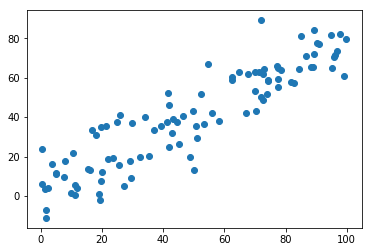

In [56]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### demean  平均值归0

In [57]:
def demean(X):
    """求行方向的平均值,即求每一列的平均"""
    # np.mean(X,axis=0) 输出矩阵是1行，求每一列的平均（按照每一行去求平均）
    return X - np.mean(X,axis=0)  

In [58]:
X_demean = demean(X)
X_demean[:10]

array([[ 20.83888589,  22.45631742],
       [ 35.21383798,  24.41598954],
       [ 18.44660729,  21.5483672 ],
       [ 23.58097942,  24.17539699],
       [ 45.94096944,  24.66355269],
       [-47.9345066 , -36.80953473],
       [ -7.84605642,  -2.57732317],
       [-44.32354692, -28.3010921 ],
       [-39.21197017, -38.83645599],
       [  1.60180428,  -4.93602824]])

#### 下图与上图的对比, 看到0点在散点的中间

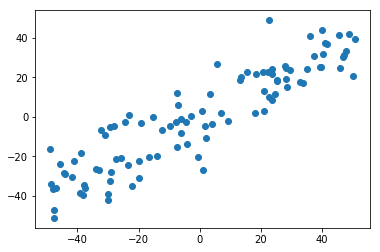

In [59]:
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

#### 查看两个维度的数据平均值, 接近0

In [60]:
np.mean(X_demean[:,0])

-7.958078640513123e-15

In [61]:
np.mean(X_demean[:,1])

1.4921397450962105e-14

### 梯度上升法

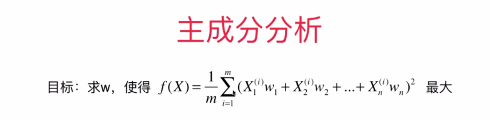

In [72]:
def f(w,X):
    """目标函数: 求w, 使得函数f(x) 最大,  见上图 """
    return np.sum((X.dot(w) ** 2)) / len(X)

def df_math(w,X):
    """求导: 数学的形式"""
    return X.T.dot(X.dot(w)) * 2. / len(X)

def df_debug(w,X,epsilon=0.0001):
    """求导: 调试的形式"""
    res = np.empty(len(w))
    for i in range(len(w)):
        # 第一个点
        w_1 = w.copy()
        w_1[i] += epsilon
        # 第二个点
        w_2 = w.copy()
        w_2[i] -= epsilon
        # 使用公式,计算
        res[i] = ( f(w_1,X) - f(w_2,X) ) / (2*epsilon)
    return res

def direction(w):
    """有方向的单位向量"""
    return w / np.linalg.norm(w)

def gradient_ascent(df,X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    """梯度上升法"""
    w = direction(initial_w) # 转化成单位方向
    cur_iter = 0 # 当前循环计数
    
    while cur_iter < n_iters:
        gradient = df(w,X) # 1,求梯度
        last_w = w # 记录上一次的w
        w = w + eta * gradient # 使用梯度计算新的w
        w = direction(w) # 注意1,每次求一个单位方向 向量, 优化性能?
        if (abs( f(w,X) - f(last_w,X) ) < epsilon):
            break
        
        cur_iter += 1
    
    return w


            
    

In [63]:
np.random.seed(seed=666)
initial_w = np.random.random(X.shape[1]) # 注意2: 不能用0向量开始
initial_w

array([0.70043712, 0.84418664])

In [73]:
eta = 0.001 # 注意3: 不能使用StandardScaler标准化数据, 因为前面已处理均值为0

#### 使用[调试模式求导]

In [65]:
gradient_ascent(df_debug,X_demean,initial_w,eta)

array([0.77660875, 0.62998321])

#### 使用[数学模式求导]

In [66]:
gradient_ascent(df_math,X_demean,initial_w,eta)

array([0.77660875, 0.62998321])

In [67]:
w = gradient_ascent(df_math,X_demean,initial_w,eta)

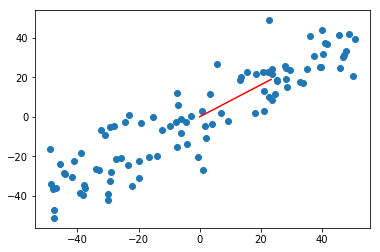

In [68]:
plt.scatter(X_demean[:,0],X_demean[:,1])
# 画出直线, 因为w比较小, 所以放大 30倍
plt.plot([0,w[0] * 30 ],[0,w[1] * 30 ],color='r')
plt.show()

### 使用极端数据集测试

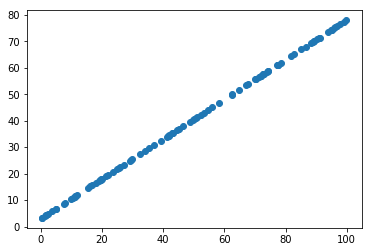

In [69]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0.,100.,size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.
plt.scatter(X2[:,0],X2[:,1])
plt.show()

求平均值?

In [70]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math,X2_demean,initial_w,eta)

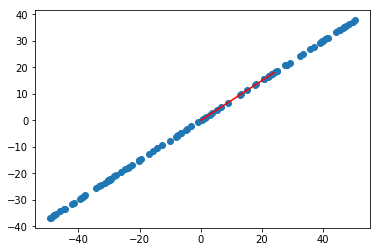

In [71]:
plt.scatter(X2_demean[:,0],X2_demean[:,1])
plt.plot([0,w2[0] * 30],[0,w2[1] * 30],color='r')
plt.show()

同学们可以自己思考实现随机梯度下降法和小批量梯度下降法的版本：）